In [445]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
sys.path.append("..")

import pandas as pd
import numpy as np
import seaborn

pd.set_option('display.max_rows', 500)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [446]:
import re
from scipy.stats import entropy

df = pd.read_csv("../contrastes/provincias.csv", quotechar="\"", decimal=",")
df = df.set_index("palabra")


fnorm_vars = [c for c in df.columns if re.match(r'fnorm_.*', c)]
cant_palabras = [c for c in df.columns if re.match(r'.*Palabras$', c)]
cant_personas = [c for c in df.columns if re.match(r'.*Personas$', c)]

In [447]:
from iv_helpers import simulated_shuffled_entropy_multinomial

fn = lambda ws: simulated_shuffled_entropy_multinomial(ws, len(cant_palabras))

df["entropy_palabras"] = df[cant_palabras].apply(entropy, axis=1, raw=True)
df["entropy_personas"] = df[cant_personas].apply(entropy, axis=1, raw=True)
df["shuffled_entropy_personas"] = df.cantUsuariosTotal.apply(fn)
df["shuffled_entropy_palabras"] = df.cantPalabra.apply(fn)

In [448]:
print df.cantUsuariosTotal.min()
print df.cantPalabra.min()

6
41


In [449]:
cantPalabrasTotales = sum(df.cantPalabra)
df['cantPalabrasTotales'] = cantPalabrasTotales

In [450]:
df.entropy_personas.describe()

count    75878.000000
mean         2.842564
std          0.409441
min          0.000000
25%          2.796571
50%          2.959232
75%          3.059217
max          3.135044
Name: entropy_personas, dtype: float64

## Si le aplico el logaritmo a la cantidad de la Palabra, ya no tiene tanta importancia la cantidad y por lo tanto, las palabras palabras comunes como **que**, **y**, **el**,etc. dejan de tener tanto valor de información

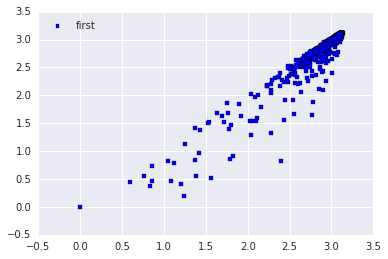

In [451]:
import matplotlib.pyplot as plt

x = df.entropy_personas[:1000]
y = df.entropy_palabras[:1000]

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x, y, s=10, c='b', marker="s", label='first')
plt.legend(loc='upper left');
plt.show()

In [452]:
df.cantPalabra.describe()

count    7.587800e+04
mean     2.484080e+03
std      6.000610e+04
min      4.100000e+01
25%      6.900000e+01
50%      1.390000e+02
75%      4.300000e+02
max      7.509160e+06
Name: cantPalabra, dtype: float64

In [453]:
import math
df['normCantPalabras']=(df.cantPalabra.apply(math.log,args=(2,))-df.cantPalabra.apply(math.log,args=(2,)).min())/(df.cantPalabra.apply(math.log,args=(2,)).max()-df.cantPalabra.apply(math.log,args=(2,)).min())
df['normCantPersonas']=(df.cantUsuariosTotal.apply(math.log,args=(2,))-df.cantUsuariosTotal.apply(math.log,args=(2,)).min())/(df.cantUsuariosTotal.apply(math.log,args=(2,)).max()-df.cantUsuariosTotal.apply(math.log,args=(2,)).min())

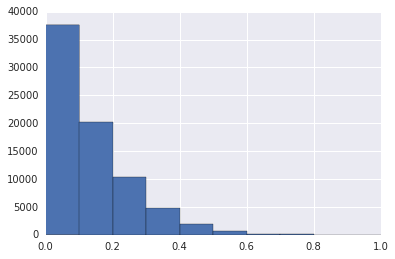

In [454]:
df.normCantPalabras.hist()

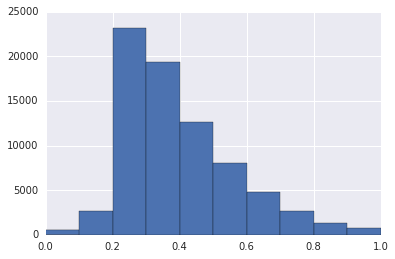

In [455]:
df.normCantPersonas.hist()

In [456]:
from iv_helpers import lugares
places = lugares()
print len(places)
df['esLugar'] = np.where(df.index.str.decode(encoding='utf-8').isin(places),'lugar','ok')

3006


In [457]:
import math

df["information_value_palabras"] = (df.cantPalabra.apply(math.log,args=(2,))) * (df.shuffled_entropy_palabras - df.entropy_palabras)
df["information_value_personas"] = (df.cantPalabra.apply(math.log,args=(2,))) * (df.shuffled_entropy_personas - df.entropy_personas)
# df["information_value_personas_palabras"] = (df.cantUsuariosTotal.apply(math.log,args=(2,))) * (df.cantPalabra.apply(math.log,args=(2,))) * (df.shuffled_entropy_personas - df.entropy_personas) * (df.shuffled_entropy_palabras - df.entropy_palabras)
# df["information_value_personas_palabras"] = df.normCantPalabras * df.normCantPersonas * (df.shuffled_entropy_personas - df.entropy_personas) * (df.shuffled_entropy_palabras - df.entropy_palabras)
df["information_value_personas_palabras"] = df.normCantPalabras * df.normCantPersonas * (df.shuffled_entropy_personas - df.entropy_personas) * (df.shuffled_entropy_palabras - df.entropy_palabras)

#df["information_value_FnormMax"] = (df.FnormMax) * (df.shuffled_entropy - df.entropy)

df.sort_values(by="information_value_personas_palabras", ascending=False, inplace=True)
df['rankPalabras'] = df['information_value_palabras'].rank(ascending=False)
df['rankPersonas'] = df['information_value_personas'].rank(ascending=False)
df['rankPalabras_Personas'] = df['information_value_personas_palabras'].rank(ascending=False)


palabrasPersonas = [c for c in df.columns if re.match(r'.*PalabrasPersonas', c)]
# df = df.set_index('palabra')
resumed = df[df.columns.difference(cant_palabras+fnorm_vars + palabrasPersonas)]
df.iloc[:1000][['cantPalabra','esLugar','cantUsuariosTotal','provinciaFnormMax','rankPalabras','rankPersonas','rankPalabras_Personas','normCantPersonas','normCantPalabras','shuffled_entropy_personas','entropy_personas']]

,cantPalabra,esLugar,cantUsuariosTotal,provinciaFnormMax,rankPalabras,rankPersonas,rankPalabras_Personas,normCantPersonas,normCantPalabras,shuffled_entropy_personas,entropy_personas
palabra,,,,,,,,,,,
chivilcoy,4074,lugar,469,buenosaires,4.0,4.0,1.0,0.532714,0.379500,3.098007,0.558161
oberá,4322,lugar,378,misiones,3.0,3.0,2.0,0.506352,0.384377,3.116431,0.569656
ushuaia,14966,lugar,1006,tierradelfuego,1.0,54.0,3.0,0.625981,0.486874,3.123172,1.453279
ush,2137,ok,465,tierradelfuego,11.0,5.0,4.0,0.531668,0.326256,3.108003,0.362702
obera,2106,lugar,410,misiones,17.0,11.0,5.0,0.516283,0.325050,3.108060,0.543877
breñas,2590,lugar,170,chaco,6.0,2.0,6.0,0.408690,0.342121,3.061545,0.232404
viedma,6584,lugar,666,rionegro,7.0,53.0,7.0,0.575573,0.419112,3.126142,1.294115
bragado,2805,lugar,294,buenosaires,9.0,9.0,8.0,0.475637,0.348702,3.110116,0.619135
logroño,2592,lugar,132,larioja,5.0,1.0,9.0,0.377771,0.342184,3.030479,0.089018


In [458]:
df.sort_values(by='information_value_personas_palabras',ascending=False,inplace=True)
df.iloc[:7000][['cantPalabra','cantUsuariosTotal','provinciaFnormMax','rankPalabras','rankPersonas','rankPalabras_Personas']]
df.iloc[:7000][['cantPalabra','cantUsuariosTotal','provinciaFnormMax','rankPalabras','rankPersonas','rankPalabras_Personas','entropy_palabras','entropy_personas']].to_csv('resumido.csv')

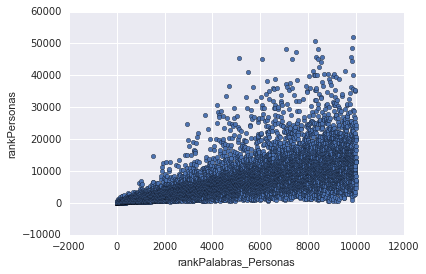

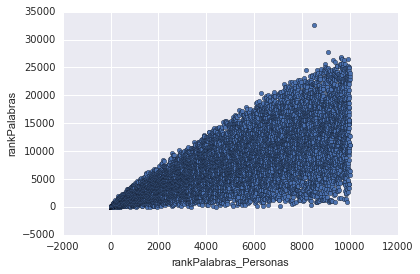

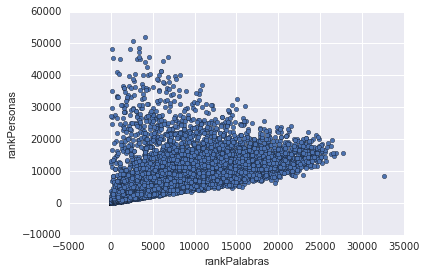

In [459]:
df.iloc[:10000].plot.scatter(x='rankPalabras_Personas',y='rankPersonas')
df.iloc[:10000].plot.scatter(x='rankPalabras_Personas',y='rankPalabras')
df.iloc[:10000].plot.scatter(x='rankPalabras',y='rankPersonas')

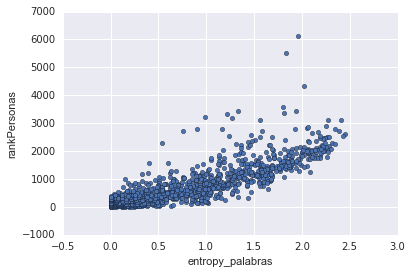

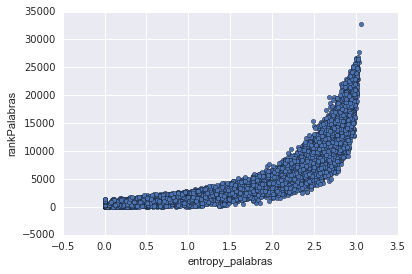

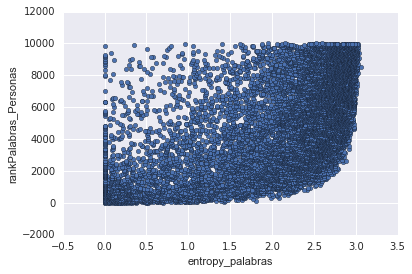

In [460]:
df.iloc[:1000].plot.scatter(x='entropy_palabras',y='rankPersonas')
df.iloc[:10000].plot.scatter(x='entropy_palabras',y='rankPalabras')
df.iloc[:10000].plot.scatter(x='entropy_palabras',y='rankPalabras_Personas')

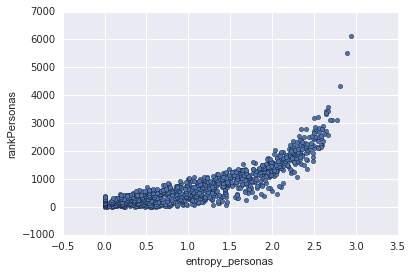

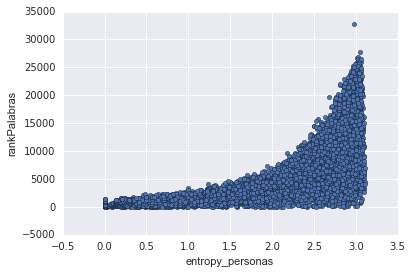

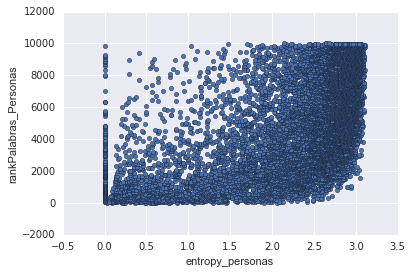

In [461]:
df.iloc[:1000].plot.scatter(x='entropy_personas',y='rankPersonas')
df.iloc[:10000].plot.scatter(x='entropy_personas',y='rankPalabras')
df.iloc[:10000].plot.scatter(x='entropy_personas',y='rankPalabras_Personas')

## Guardo los listados (resumidos, y extendidos) ordenados en base a las dos médidas de información

In [462]:
df.sort_values(by="information_value_palabras", ascending=False, inplace=True)
resumed = df[df.columns.difference(cant_palabras+fnorm_vars + palabrasPersonas)]
resumed.to_csv('ivalue_entropia_palabras_resumida.csv')
df.to_csv('ivalue_entropia_palabras.csv')

df.sort_values(by="information_value_personas", ascending=False, inplace=True)
resumed = df[df.columns.difference(cant_palabras+fnorm_vars + palabrasPersonas)]
resumed.to_csv('ivalue_entropia_personas_resumida.csv')
df.to_csv('ivalue_entropia_personas.csv')

df.sort_values(by="information_value_personas_palabras", ascending=False, inplace=True)
resumed = df[df.columns.difference(cant_palabras+fnorm_vars + palabrasPersonas)]
resumed.to_csv('ivalue_entropia_personas_palabras_resumida.csv')
df.to_csv('ivalue_entropia_personas_palabras.csv')

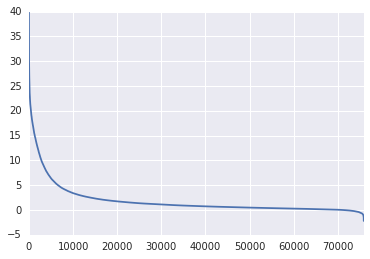

In [463]:
df.sort_values(by="information_value_palabras", ascending=False, inplace=True)
df2 = df.reset_index()
df2.information_value_palabras.plot.line()

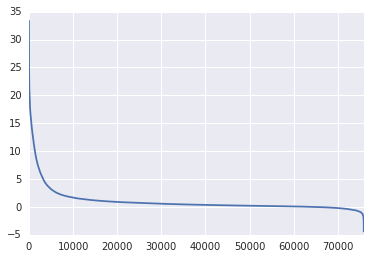

In [464]:
df.sort_values(by="information_value_personas", ascending=False, inplace=True)
df2 = df.reset_index()

df2.information_value_personas.plot.line()

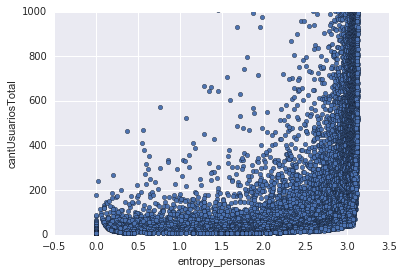

In [465]:
import seaborn
df.plot.scatter(x="entropy_personas", y="cantUsuariosTotal", ylim=[0, 1000])

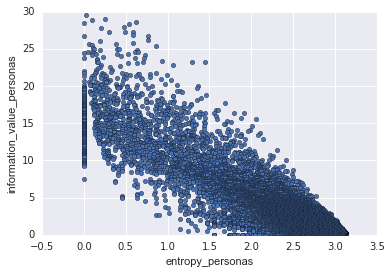

In [466]:
import seaborn
df.plot.scatter(x="entropy_personas", y="information_value_personas", ylim=[0, 30])

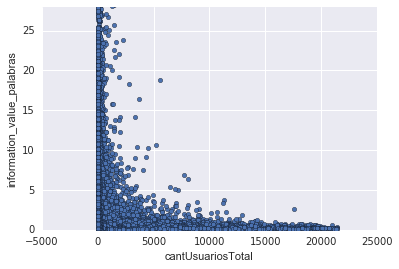

In [467]:
import seaborn
df.plot.scatter(x="cantUsuariosTotal", y="information_value_palabras", ylim=[0, 28])

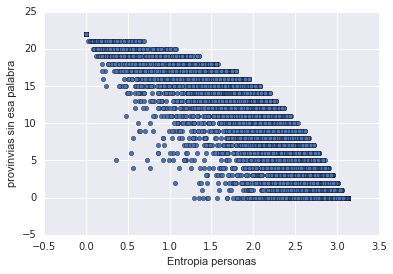

In [468]:
plt.figure(1)
df.plot.scatter(x="entropy_personas", y="provinciaSinEsaPalabra")
plt.xlabel("Entropia personas")
plt.ylabel("provinvias sin esa palabra")


plt.show()


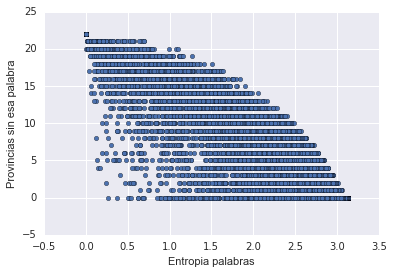

In [469]:

plt.figure(2)
df.plot.scatter(x="entropy_palabras", y="provinciaSinEsaPalabra")
plt.xlabel("Entropia palabras")
plt.ylabel("Provincias sin esa palabra")

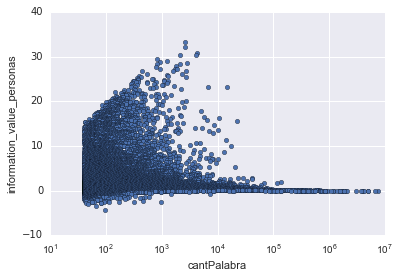

In [470]:
import seaborn
df.plot.scatter(y="information_value_personas", x="cantPalabra", logx=True)

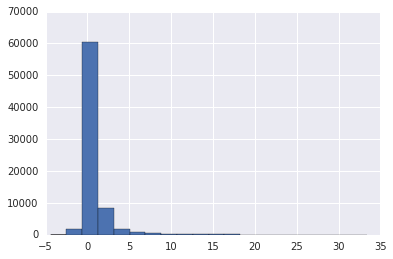

In [471]:
df.information_value_personas.hist(bins=20)

In [472]:
resumed[df.information_value_personas < 0].iloc[:100]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,FnormMax,FnormMin,cantPalabra,cantPalabrasTotales,cantUsuariosTotal,entropy_palabras,entropy_personas,esLugar,information_value_palabras,information_value_personas,...,normCantPalabras,normCantPersonas,provinciaFnormMax,provinciaFnormMin,provinciaSinEsaPalabra,rankPalabras,rankPalabras_Personas,rankPersonas,shuffled_entropy_palabras,shuffled_entropy_personas
palabra,,,,,,,,,,,,,,,,,,,,,
invierta,0.672068,0.110847,68,188487018,64,3.029250,3.029509,ok,-0.906332,-1.545714,...,0.041751,0.289297,jujuy,neuquen,1,75702.0,25172.0,75765.0,2.880365,2.775591
sirveee,0.564186,0.105675,60,188487018,58,3.053018,3.040034,ok,-1.219726,-1.483815,...,0.031422,0.277266,santafe,entrerios,0,75841.0,25317.0,75740.0,2.846526,2.788833
marcharse,0.887932,0.211350,91,188487018,89,3.071954,3.073044,ok,-1.136920,-0.721006,...,0.065793,0.329598,larioja,entrerios,0,75822.0,26225.0,74531.0,2.897252,2.962253
cog,0.695954,0.106356,60,188487018,59,2.991271,2.993892,ok,-1.095493,-1.356798,...,0.031422,0.279356,formosa,mendoza,1,75813.0,27666.0,75672.0,2.805811,2.764194
solto,0.720540,0.106356,83,188487018,79,3.063227,3.065483,ok,-0.999786,-0.814292,...,0.058200,0.315031,sanluis,mendoza,0,75755.0,27867.0,74834.0,2.906399,2.937752
utópico,1.176119,0.100082,67,188487018,62,3.019666,3.051204,ok,-1.160212,-1.005662,...,0.040528,0.285417,jujuy,rionegro,0,75828.0,27878.0,75289.0,2.828404,2.885420
mantenme,0.815691,0.100082,74,188487018,66,3.027812,3.039419,ok,-0.859692,-1.026150,...,0.048728,0.293058,santiago,rionegro,0,75655.0,29403.0,75321.0,2.889363,2.874162
perdiendooo,0.600491,0.108242,56,188487018,52,3.009902,3.016309,ok,-1.073100,-1.510264,...,0.025729,0.263921,rionegro,tucuman,0,75805.0,29416.0,75752.0,2.825119,2.756248
apagarme,0.974336,0.122529,80,188487018,75,2.989138,3.001638,ok,-1.031748,-0.734656,...,0.055162,0.308681,formosa,catamarca,0,75784.0,29543.0,74575.0,2.825937,2.885430


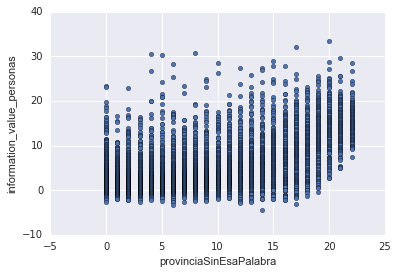

In [473]:
df.plot.scatter(x="provinciaSinEsaPalabra", y="information_value_personas")

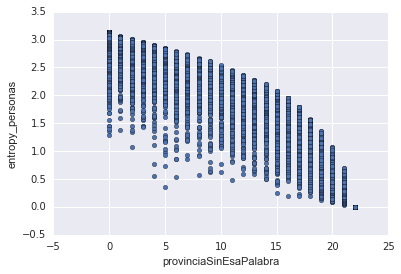

In [474]:
df.plot.scatter(x="provinciaSinEsaPalabra", y="entropy_personas")

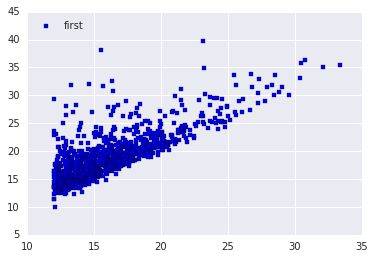

In [475]:
import seaborn
import matplotlib.pyplot as plt

x = df.information_value_personas[:1000]
y = df.information_value_palabras[:1000]

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x, y, s=10, c='b', marker="s", label='first')
plt.legend(loc='upper left');
plt.show()

In [476]:
df[df.provinciaSinEsaPalabra > 17].iloc[:5000][["cantPalabra", "provinciaSinEsaPalabra"]]

,cantPalabra,provinciaSinEsaPalabra
palabra,,
logroño,2592,20
chivil,811,21
sciurano,929,20
ipauss,812,22
plottier,908,20
vallerga,448,22
kraka,382,21
unju,1282,19
calahorra,422,21


In [477]:
df.cantPalabra.apply(math.log,args=(2,)).describe()

count    75878.000000
mean         7.709320
std          2.102951
min          5.357552
25%          6.108524
50%          7.118941
75%          8.748193
max         22.840220
Name: cantPalabra, dtype: float64

In [478]:
(df.shuffled_entropy_personas - df.entropy_personas).describe()

count    75878.000000
mean         0.142087
std          0.336543
min         -0.664831
25%          0.013535
50%          0.050017
75%          0.135911
max          3.069794
dtype: float64

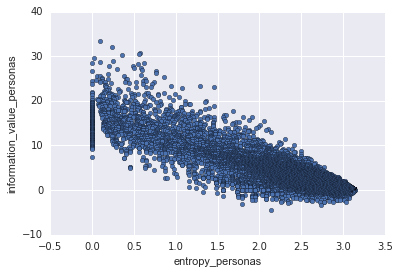

In [479]:
df.plot.scatter(x="entropy_personas", y="information_value_personas")

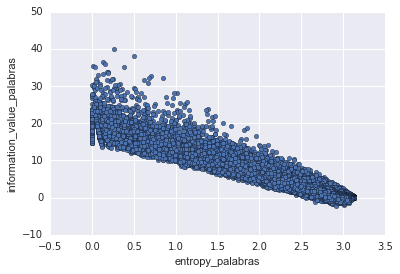

In [480]:
df.plot.scatter(x="entropy_palabras", y="information_value_palabras")

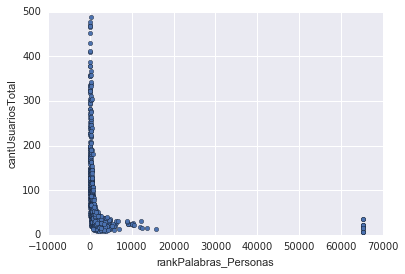

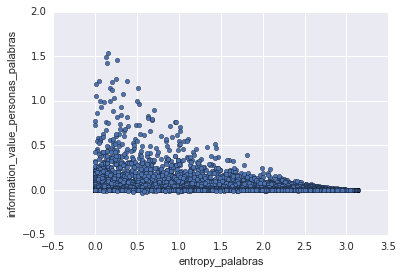

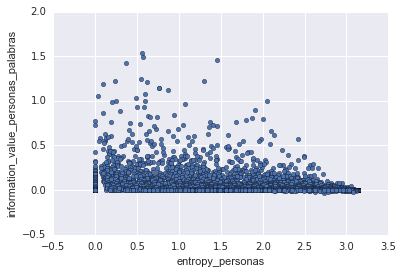

In [481]:
df.iloc[:1000].plot.scatter(x="rankPalabras_Personas", y="cantUsuariosTotal",ylim=[0,500])

df.plot.scatter(x="entropy_palabras", y="information_value_personas_palabras")
df.plot.scatter(x="entropy_personas", y="information_value_personas_palabras")


In [482]:
df.iloc[:5000][df.iloc[:5000].esLugar == 'lugar'].count()

buenosairesPalabras                    536
catamarcaPalabras                      536
chacoPalabras                          536
chubutPalabras                         536
cordobaPalabras                        536
corrientesPalabras                     536
entreriosPalabras                      536
formosaPalabras                        536
jujuyPalabras                          536
lapampaPalabras                        536
lariojaPalabras                        536
mendozaPalabras                        536
misionesPalabras                       536
neuquenPalabras                        536
rionegroPalabras                       536
saltaPalabras                          536
sanjuanPalabras                        536
sanluisPalabras                        536
santacruzPalabras                      536
santafePalabras                        536
santiagoPalabras                       536
tierradelfuegoPalabras                 536
tucumanPalabras                        536
cantPalabra